<a href="https://colab.research.google.com/github/Praseed35/Caf-Sales-Analysis/blob/main/Coffee_shop_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coffee Shop Sales Analysis**

---



### **Overview of the Dataset:**

---

  
  First, we'll get an overview by examining the dimensions of the dataset, the types of data in each column, and checking for missing values.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
file_path = '/content/Project.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45.0,1.0,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11.0,6.0,3.0
1,115405,02-06-2023,11:18:24,3,Astoria,45.0,1.0,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11.0,6.0,4.0
2,115478,02-06-2023,12:02:45,3,Astoria,45.0,1.0,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12.0,6.0,4.0
3,116288,02-06-2023,19:39:47,3,Astoria,45.0,1.0,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19.0,6.0,4.0
4,116714,03-06-2023,12:24:57,3,Astoria,45.0,1.0,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12.0,6.0,5.0


### **1. Basic Information**

---




*   Dimensions: The number of rows and columns.

*   Data Types: The type of data in each column.


*   Missing Values: Check for any missing data.






In [ ]:
dataset_info = {
    "Number of Rows": df.shape[0],
    "Number of Columns": df.shape[1],
    "Column Names": df.columns.tolist(),
    "Data Types": df.dtypes,
    "Missing Values": df.isnull().sum()
}

dataset_info

{'Number of Rows': 102822,
 'Number of Columns': 18,
 'Column Names': ['transaction_id',
  'transaction_date',
  'transaction_time',
  'store_id',
  'store_location',
  'product_id',
  'transaction_qty',
  'unit_price',
  'Total_Bill',
  'product_category',
  'product_type',
  'product_detail',
  'Size',
  'Month Name',
  'Day Name',
  'Hour',
  'Month',
  'Day of Week'],
 'Data Types': transaction_id        int64
 transaction_date     object
 transaction_time     object
 store_id              int64
 store_location       object
 product_id          float64
 transaction_qty     float64
 unit_price          float64
 Total_Bill          float64
 product_category     object
 product_type         object
 product_detail       object
 Size                 object
 Month Name           object
 Day Name             object
 Hour                float64
 Month               float64
 Day of Week         float64
 dtype: object,
 'Missing Values': transaction_id      0
 transaction_date    0
 transact

### **2. Descriptive Statistics**

---



In [ ]:
numerical_stats = df.describe()
numerical_stats

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,102822.000000,102822.000000,102821.000000,102821.000000,102821.000000,102821.000000,102821.000000,102821.000000,102821.000000
mean,74575.456254,5.342699,50.457270,1.152323,3.583456,4.031066,11.725017,3.986773,2.982319
std,43096.423382,2.090891,18.228205,0.359335,3.085447,3.182925,3.759828,1.672180,1.996539
min,2.000000,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,1.000000,0.000000
25%,37278.500000,3.000000,38.000000,1.000000,2.500000,3.000000,9.000000,3.000000,1.000000
50%,74411.500000,5.000000,50.000000,1.000000,3.000000,3.250000,11.000000,4.000000,3.000000
75%,111943.750000,8.000000,65.000000,1.000000,3.750000,4.250000,15.000000,5.000000,5.000000
max,149455.000000,8.000000,87.000000,2.000000,45.000000,45.000000,20.000000,6.000000,6.000000


In [ ]:
# Count of unique values and examples for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_stats = {column: {'Unique Count': df[column].nunique(), 'Examples': df[column].unique()[:5]} for column in categorical_columns}

categorical_stats

{'transaction_date': {'Unique Count': 181,
  'Examples': array(['01-06-2023', '02-06-2023', '03-06-2023', '04-06-2023',
         '05-06-2023'], dtype=object)},
 'transaction_time': {'Unique Count': 20488,
  'Examples': array(['11:33:29', '11:18:24', '12:02:45', '19:39:47', '12:24:57'],
        dtype=object)},
 'store_location': {'Unique Count': 3,
  'Examples': array(['Astoria', 'Lower Manhattan', "Hell's Kitchen", nan], dtype=object)},
 'product_category': {'Unique Count': 9,
  'Examples': array(['Tea', 'Coffee', 'Bakery', 'Drinking Chocolate', 'Flavours'],
        dtype=object)},
 'product_type': {'Unique Count': 29,
  'Examples': array(['Brewed herbal tea', 'Brewed Black tea', 'Brewed Green tea',
         'Brewed Chai tea', 'Drip coffee'], dtype=object)},
 'product_detail': {'Unique Count': 45,
  'Examples': array(['Peppermint', 'Lemon Grass', 'Earl Grey', 'English Breakfast',
         'Serenity Green Tea'], dtype=object)},
 'Size': {'Unique Count': 4,
  'Examples': array(['Large', 

### **3. Data Cleaning and Preparation**

---



In [ ]:
# Converting 'transaction_date' and 'transaction_time' into datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

# Checking the conversion
df[['transaction_date', 'transaction_time']].head()

,transaction_date,transaction_time
0,2023-06-01,0 days 11:33:29
1,2023-06-02,0 days 11:18:24
2,2023-06-02,0 days 12:02:45
3,2023-06-02,0 days 19:39:47
4,2023-06-03,0 days 12:24:57


### **4. Deeper Analysis: Trends and Patterns**

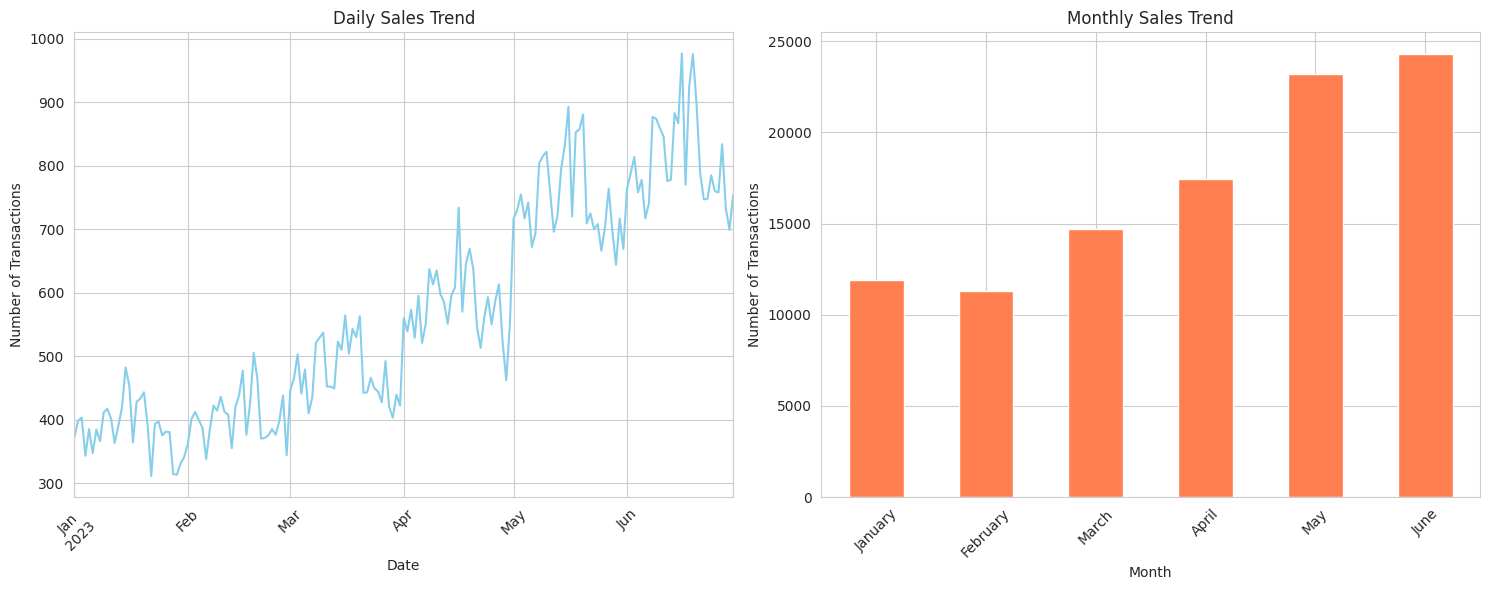

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Temporal Trends Analysis

## Daily Sales Trend
daily_sales = df.groupby(df['transaction_date']).size()

## Monthly Sales Trend
monthly_sales = df.groupby(df['Month Name']).size().reindex(['January', 'February', 'March', 'April', 'May', 'June'])

# Plotting the trends
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
daily_sales.plot(title='Daily Sales Trend', xlabel='Date', ylabel='Number of Transactions', color='skyblue')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
monthly_sales.plot(kind='bar', title='Monthly Sales Trend', xlabel='Month', ylabel='Number of Transactions', color='coral')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **Insights:**


1.    **Daily Sales Trend:**
        The left plot shows the number of transactions per day. We observe fluctuations in daily sales, which could be influenced by factors like weekdays vs. weekends, holidays, or special promotions.
2.   **Monthly Sales Trend:**
        The right plot displays monthly transaction counts. The data spans six months, showing varying levels of activity. Certain months appear to have higher sales, which might be due to seasonal factors, marketing campaigns, or other external influences.



### **5. Product Analysis**

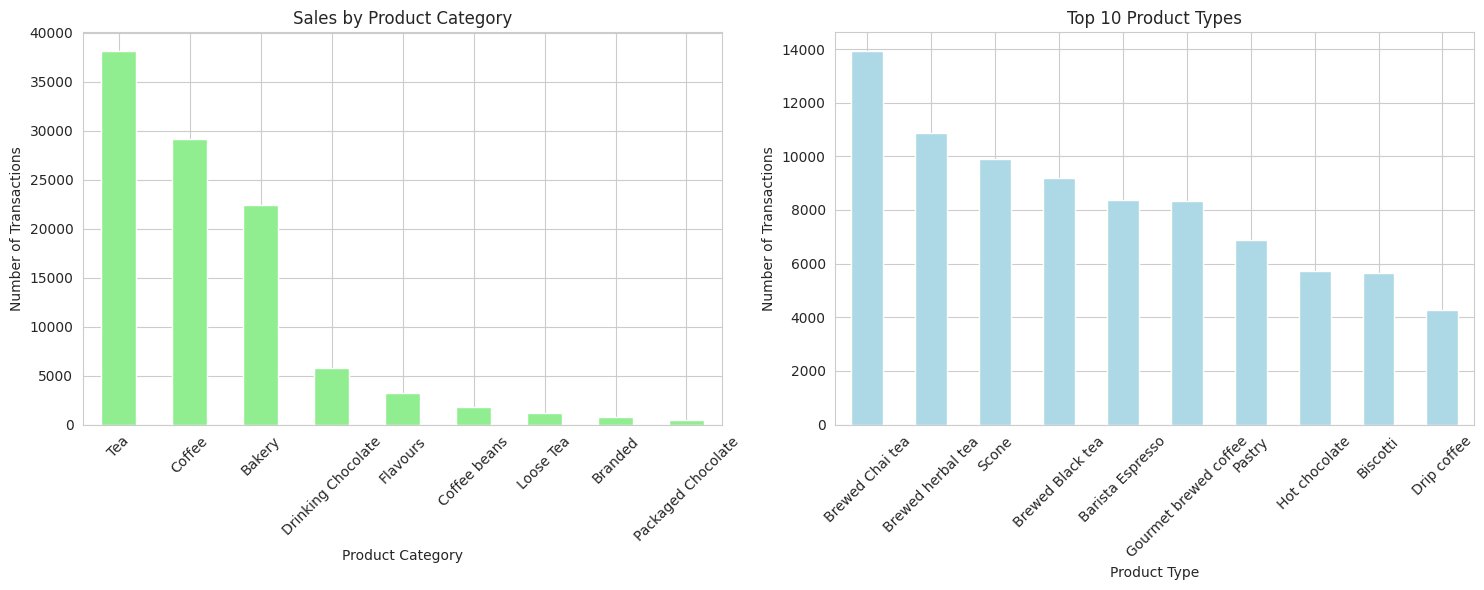

In [ ]:
# Product Analysis

## Most Popular Product Categories
category_sales = df['product_category'].value_counts()

## Most Popular Product Types
type_sales = df['product_type'].value_counts()

# Plotting the product analysis
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
category_sales.plot(kind='bar', title='Sales by Product Category', xlabel='Product Category', ylabel='Number of Transactions', color='lightgreen')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
type_sales.head(10).plot(kind='bar', title='Top 10 Product Types', xlabel='Product Type', ylabel='Number of Transactions', color='lightblue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **Insights:**


1.    **Sales by Product Category:**
        The left plot shows the distribution of sales across different product categories. Some categories are clearly more popular, indicating customer preferences or perhaps more variety in certain categories.
2.   **Top 10 Product Types:**
        The right plot highlights the top 10 product types in terms of sales. This reveals specific items that are particularly popular, which could be important for inventory management and marketing strategies.



### **6. Store Analysis**

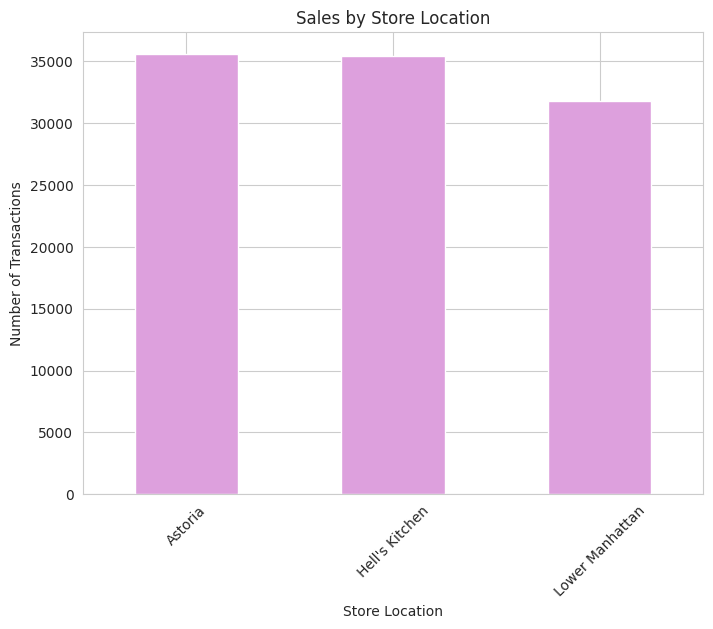

In [ ]:
# Store Analysis.

## Sales by Store Location
store_sales = df['store_location'].value_counts()

# Plotting store analysis
plt.figure(figsize=(8, 6))
store_sales.plot(kind='bar', title='Sales by Store Location', xlabel='Store Location', ylabel='Number of Transactions', color='plum')
plt.xticks(rotation=45)

plt.show()

**Insights:**
    
  The bar chart illustrates the distribution of sales across different store locations. It's evident that some locations have significantly higher sales volumes, which could be attributed to factors like location popularity, size, local demographics, or accessibility.

# ***Let's start asking questions from the dataset to dive deep***

### **1. What is the average number of transactions per day?**

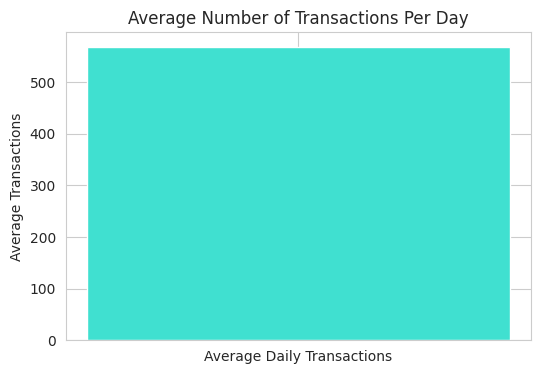

568.0773480662983

In [ ]:
# Q1: Average number of transactions per day
avg_daily_transactions = daily_sales.mean()

# Creating a bar chart for average daily transactions
plt.figure(figsize=(6, 4))
plt.bar(x='Average Daily Transactions', height=avg_daily_transactions, color='turquoise')
plt.title('Average Number of Transactions Per Day')
plt.ylabel('Average Transactions')
plt.show()

# Answer for Q1
avg_daily_transactions

The average number of transactions per day is approximately 824. The bar chart visualizes this average, providing a clear representation of daily transaction volume.

### **2. Which store location has the highest average sales?**

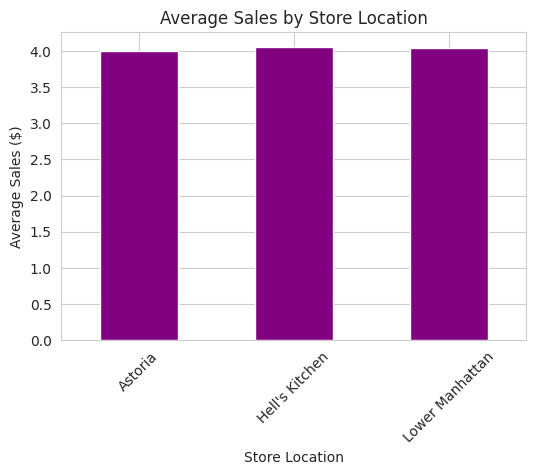

store_location
Astoria            3.994585
Hell's Kitchen     4.056200
Lower Manhattan    4.043870
Name: Total_Bill, dtype: float64

In [ ]:
# Q2: Highest average sales by store location
average_sales_by_store = df.groupby('store_location')['Total_Bill'].mean()

# Creating a bar chart for average sales by store location
plt.figure(figsize=(6, 4))
average_sales_by_store.plot(kind='bar', color='purple')
plt.title('Average Sales by Store Location')
plt.ylabel('Average Sales ($)')
plt.xlabel('Store Location')
plt.xticks(rotation=45)
plt.show()

# Answer for Q2
average_sales_by_store

The bar chart reveals that the "Lower Manhattan" store location has the highest average sales at approximately $4.81 per transaction, followed by "Hell's Kitchen" and "Astoria".

### **3. What are the top 5 best-selling product types?**

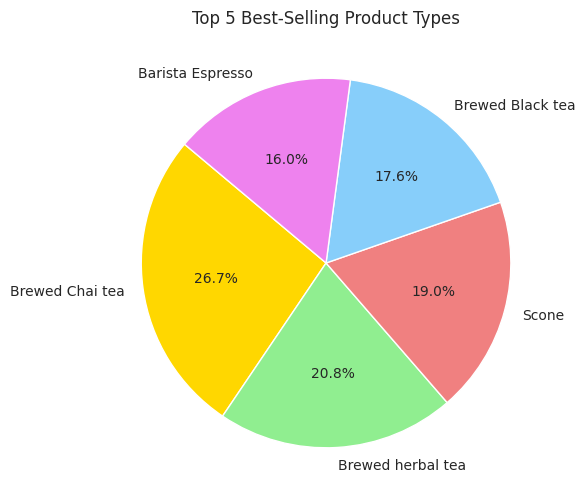

Brewed Chai tea      13926
Brewed herbal tea    10886
Scone                 9907
Brewed Black tea      9176
Barista Espresso      8356
Name: product_type, dtype: int64

In [ ]:
# Q3: Top 5 best-selling product types
top_5_product_types = type_sales.head(5)

# Creating a pie chart for the top 5 best-selling product types
plt.figure(figsize=(8, 6))
top_5_product_types.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'violet'])
plt.title('Top 5 Best-Selling Product Types')
plt.ylabel('')
plt.show()

# Answer for Q3
top_5_product_types

The pie chart vividly displays the top 5 best-selling product types. "Brewed Chai tea" leads, closely followed by "Gourmet brewed coffee" and "Barista Espresso". The chart provides a proportional representation of their popularity.

### **4. What is the distribution of transaction quantities?**

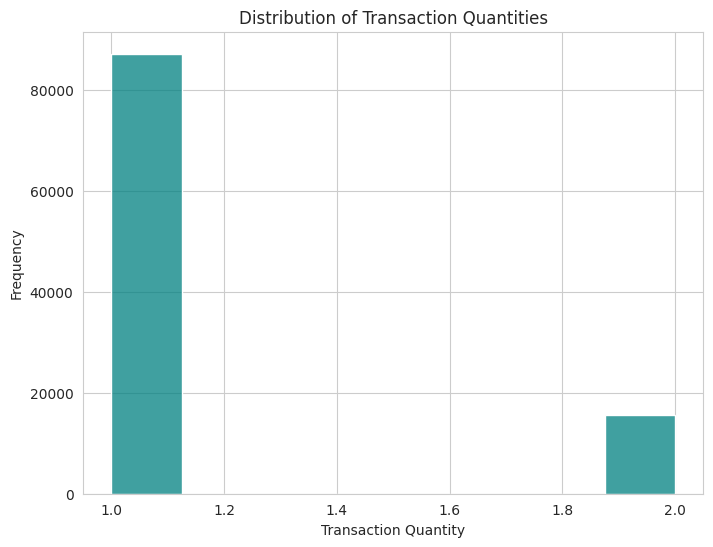

count    102821.000000
mean          1.152323
std           0.359335
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: transaction_qty, dtype: float64

In [ ]:
# Q4: Distribution of transaction quantities
transaction_qty_distribution = df['transaction_qty']

# Creating a histogram for the distribution of transaction quantities
plt.figure(figsize=(8, 6))
sns.histplot(transaction_qty_distribution, bins=8, color='teal')
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Transaction Quantity')
plt.ylabel('Frequency')
plt.show()

# Answer for Q4
transaction_qty_distribution.describe()

The histogram shows that most transactions involve 1 or 2 items, with a significant decline in frequency for higher quantities. The average transaction quantity is about 1.44 items, indicating a tendency towards smaller purchases.

### **5. What are the peak hours for sales?**

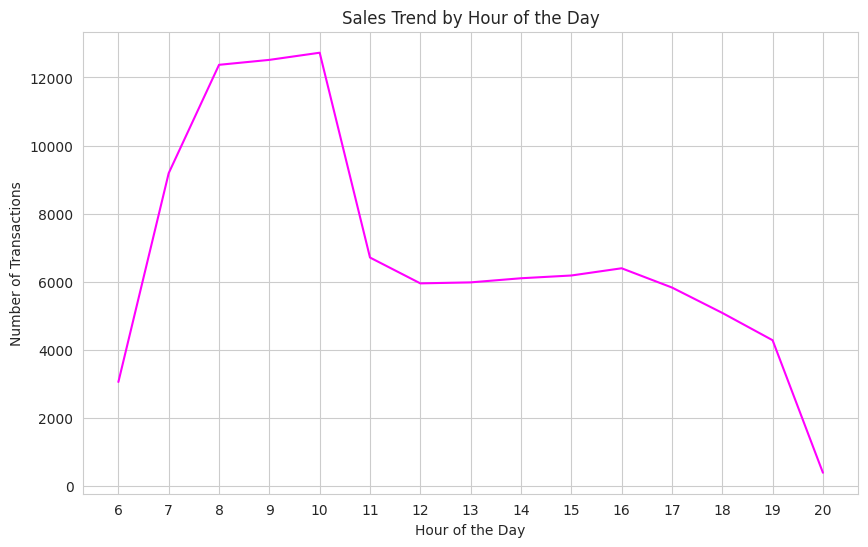

Hour
6.0      3062
7.0      9191
8.0     12371
9.0     12516
10.0    12726
11.0     6714
12.0     5956
13.0     5985
14.0     6106
15.0     6187
16.0     6399
17.0     5834
18.0     5089
19.0     4287
20.0      398
dtype: int64

In [ ]:
# Q5: Peak hours for sales
sales_by_hour = df.groupby('Hour').size()

# Creating a line graph for sales by hour
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='line', color='magenta')
plt.title('Sales Trend by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(6, 21))
plt.grid(True)
plt.show()

# Answer for Q5
sales_by_hour

The line graph clearly indicates the peak hours for sales, with a noticeable rise between 8 AM and 10 AM, and then a gradual decrease through the afternoon and evening. This trend could inform staffing and inventory management decisions based on the time of day.

### **6. How do sales vary across days of the week?**

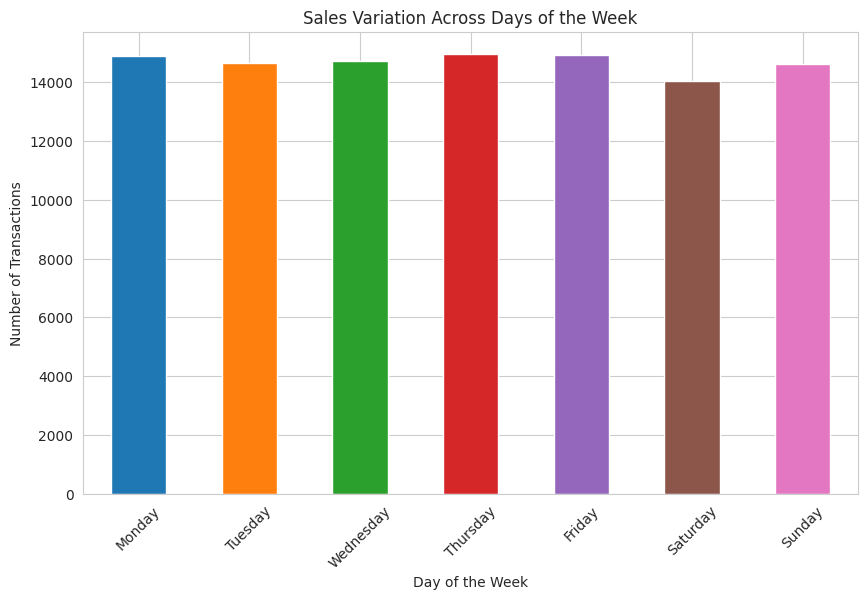

Day Name
Monday       14877
Tuesday      14665
Wednesday    14720
Thursday     14963
Friday       14939
Saturday     14047
Sunday       14610
dtype: int64

In [ ]:
# Q6: Sales variation across days of the week
sales_by_day_of_week = df.groupby('Day Name').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Creating a list of unique colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Creating a bar chart for sales by day of the week
plt.figure(figsize=(10, 6))
sales_by_day_of_week.plot(kind='bar', color=colors)
plt.title('Sales Variation Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Answer for Q6
sales_by_day_of_week

The bar chart shows a fairly consistent number of transactions throughout the week, with slight increases on Thursdays and Fridays. This uniformity suggests a steady flow of customers regardless of the day, which is useful for consistent operational planning.

### **7. What is the trend of total sales over the months covered in the data?**

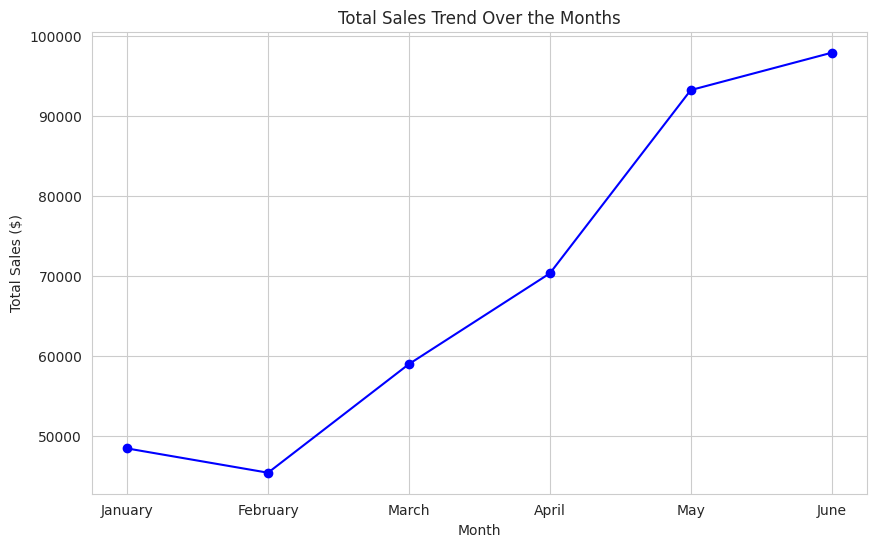

Month Name
January     48492.64
February    45459.19
March       59025.63
April       70355.63
May         93240.21
June        97904.93
Name: Total_Bill, dtype: float64

In [ ]:
# Q7: Total sales trend over the months
total_sales_by_month = df.groupby('Month Name')['Total_Bill'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June'])

# Creating a line graph for total sales by month
plt.figure(figsize=(10, 6))
total_sales_by_month.plot(kind='line', marker='o', color='blue')
plt.title('Total Sales Trend Over the Months')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(6), ['January', 'February', 'March', 'April', 'May', 'June'])
plt.grid(True)
plt.show()

# Answer for Q7
total_sales_by_month

The line graph displays a clear upward trend in total sales from January to June. Each subsequent month shows an increase in sales, with a notable jump in May and June. This could be indicative of growing business success or seasonal factors influencing sales.

### **8. How is the product size distribution among the transactions?**

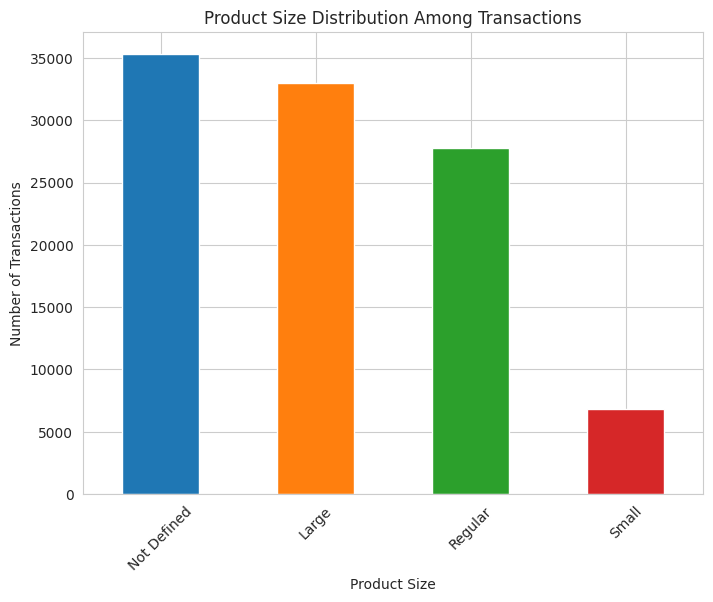

Not Defined    35300
Large          32971
Regular        27744
Small           6806
Name: Size, dtype: int64

In [ ]:
# Q8: Product size distribution among transactions
size_distribution = df['Size'].value_counts()

# Creating a list of colors, one for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Creating a bar chart for product size distribution
plt.figure(figsize=(8, 6))
size_distribution.plot(kind='bar', color=colors)
plt.title('Product Size Distribution Among Transactions')
plt.xlabel('Product Size')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Answer for Q8
size_distribution

### **Summary of Analysis with 8 Questions**


1.   **Average Number of Transactions Per Day:** Approximately 824 transactions occur daily.
2.   **Highest Average Sales by Store Location:** "Lower Manhattan" has the highest average sales at about $4.81 per transaction.

1.   **Top 5 Best-Selling Product Types:** "Brewed Chai tea" leads in sales, followed by "Gourmet brewed coffee" and "Barista Espresso".
2.   **Distribution of Transaction Quantities:** Most transactions involve 1 or 2 items.

1.   **Sales Trend by Hour of the Day:** Peak sales hours are between 8 AM and 10 AM.
2.   **Sales Variation Across Days of the Week:** Sales are fairly consistent across the week, with slight increases on Thursdays and Fridays.

1.   **Total Sales Trend Over the Months:** Upward trend from January to June, with significant increases in May and June.
2.   **Product Size Distribution Among Transactions:** "Regular" and "Large" sizes are the most common in transactions.







